In [1]:
import pandas as pd
import altair as alt

In [2]:
alt.data_transformers.enable('default', max_rows=None) 

DataTransformerRegistry.enable('default')

In [5]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [3]:
df = pd.read_csv('https://gist.githubusercontent.com/andriy-gazin/cdd08754ca4158cdd933780d789e867a/raw/8ac67885806bb960b221a80773776c2fedf94291/weather_vs_electricity_consumption.csv')
df.head()

,date,tavg,consumption,month,season
0,2016-01-01,-11.932927,363439,January,Winter
1,2016-01-02,-14.957317,442786,January,Winter
2,2016-01-03,-17.039024,460553,January,Winter
3,2016-01-04,-16.225610,503460,January,Winter
4,2016-01-05,-10.917073,507364,January,Winter


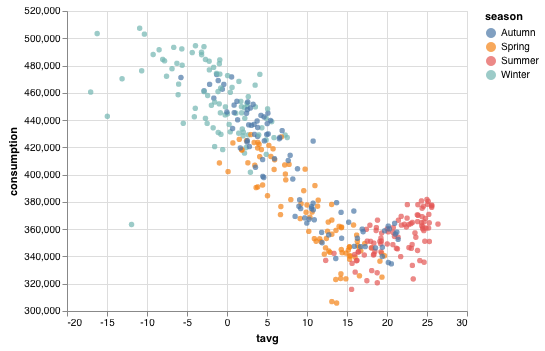

In [17]:
alt.Chart(df).mark_circle().encode(x="tavg", y=alt.Y('consumption', scale=alt.Scale(zero=False)), color='season')

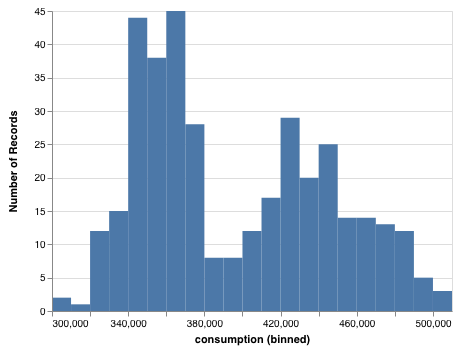

In [19]:
alt.Chart(df).mark_rect().encode(x=alt.X('consumption', bin=alt.Bin(step=10000)), y=alt.Y('count()'))

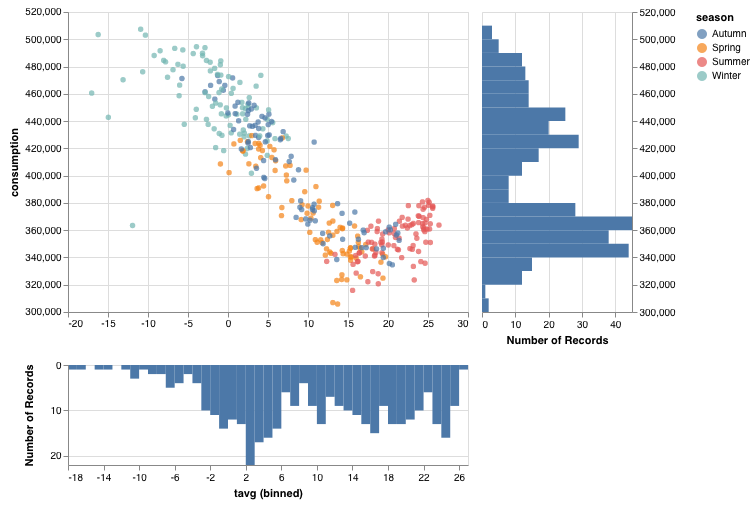

In [34]:
scat = alt.Chart(df).mark_circle().encode(x=alt.X("tavg", axis=alt.Axis(title=None)), 
                                          y=alt.Y('consumption', scale=alt.Scale(zero=False)), color='season')

rhist = alt.Chart(df).mark_rect().encode(y=alt.Y('consumption', bin=alt.Bin(step=10000),
                                                scale=alt.Scale(domain=[300000, 520000]),
                                                axis=alt.Axis(orient='right', title=None)),
                                        x=alt.X('count()'))\
                                 .properties(width=150)

bhist = alt.Chart(df).mark_rect().encode(x=alt.X('tavg', bin=alt.Bin(step=1)),
                                         y=alt.Y('count()', sort='descending'))\
                                 .properties(height=100)

alt.vconcat(alt.hconcat(scat, rhist), bhist)


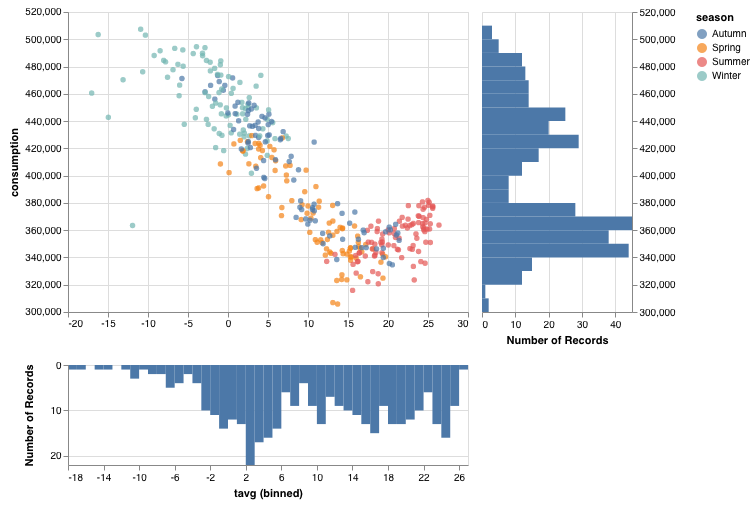

In [36]:
brush = alt.selection(type='interval')


scat = alt.Chart(df).mark_circle().encode(x=alt.X("tavg", axis=alt.Axis(title=None)), 
                                          y=alt.Y('consumption', scale=alt.Scale(zero=False)), color='season')\
                                         .add_selection(brush)

rhist = alt.Chart(df).mark_rect().encode(y=alt.Y('consumption', bin=alt.Bin(step=10000),
                                                scale=alt.Scale(domain=[300000, 520000]),
                                                axis=alt.Axis(orient='right', title=None)),
                                        x=alt.X('count()'))\
                                 .transform_filter(brush).properties(width=150)

bhist = alt.Chart(df).mark_rect().encode(x=alt.X('tavg', bin=alt.Bin(step=1)),
                                         y=alt.Y('count()', sort='descending'))\
                                 .transform_filter(brush).properties(height=100)

alt.vconcat(alt.hconcat(scat, rhist), bhist)


https://gist.githubusercontent.com/andriy-gazin/2fa2836cc9287fc3fa0bed034fe08bbb/raw/fb1d8293da37bebdc3650c1f4e31bd3ff34f1580/electricity.csv